---
# Le concept de phaseur
---
> Allez en salle de TP Linux ou connectez-vous avec votre ordinateur personnel au [VPN + monTP + salle virtuelle Linux](https://montp.insa-toulouse.fr/)  
> Puis SEULEMENT LA PREMIÈRE FOIS taper [la ligne de commande d'installation](https://github.com/balaise31/Signal/blob/main/installation/README.md#Pour-les-2IMACS)

Vous pourrez lancer la commande `go_continu` dans un terminal, une fenêtre apparait et naviguez vers  :  
   Readme -> td -> SYS-2 Bac à sable   
pour retrouver cette page :  **vous pouvez modifier et exécuter votre code**.



# Onde imaginaire et partie réelle
---

On peut représenter l'onde complexe $t\mapsto e^{i.\omega.t}$ (notée en bref $e^{i.\omega.\bullet}$) dans le plan complexe (vision phaseur/Fresnel) ou la projeter sur les réels pour obtenir un cosinus.

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=18,8

from numpy import pi, real, imag, abs, angle, cos, sin, exp, arange, sqrt

In [2]:
def plot_cplx(s, tps=0, t=None ):
    if t is None:
        Te=0.01
        t=arange(-1.1,1.2,Te)
    else:
        Te=t[1]-t[0]

    
    fig = plt.figure(figsize=plt.figaspect(1.))
    axcpl=fig.add_subplot(221)
    axcpl.set_xlabel(f'Réel')
    axcpl.set_ylabel(f'Imag')
    axcpl.set_title(f'Plan Laplace')
    axcpl.grid("on")
    
    aximag=fig.add_subplot(222)
    aximag.set_xlabel(f't')
    aximag.set_ylabel(f'Imaginaire')
    aximag.set_title(f'Projection sur imaginaire')
    aximag.grid("on")
    
    axreel=fig.add_subplot(223)
    axreel.set_xlabel(f't')
    axreel.set_ylabel(f'Réel')
    axreel.set_title(f'Projection sur réels')
    axreel.grid("on")
    
    ax3d = fig.add_subplot(224,projection='3d')
    ax3d.set_xlabel(f't')
    ax3d.set_zlabel(f'Réel')
    ax3d.set_ylabel(f'Imaginaire')
    ax3d.set_title(f'Onde complexe 3d')
    
    sig=s(t)
    teta = arange(0,6.28,0.1)
    axcpl.plot(real(exp(1j*teta)),imag(exp(1j*teta)),'k--') 
    axcpl.plot(real(sig),imag(sig))
    axcpl.plot(real(s(tps)),imag(s(tps)),'o')
    aximag.plot(t,imag(sig))
    aximag.plot(tps,imag(s(tps)),'o')
    axreel.plot(t,real(sig))
    axreel.plot(tps,real(s(tps)),'o')
    ax3d.plot(t,imag(sig),real(sig))
    ax3d.plot(tps,imag(s(tps)),real(s(tps)),'o')
    
def plot_onde_pure(tps=0,w=2*pi):
    onde = lambda t : exp(1j*w*t)
    tlast = min(100,2.2*pi/w)
    t=arange(0,tlast,tlast/1000)
    plot_cplx(onde,t=t,tps=tps)
    

In [4]:
#plot_cplx(lambda t : onde(w,t),t=t)
_ = interact(plot_onde_pure, tps=(0,1.1,0.1), w=(0,4*pi,pi/8))

interactive(children=(FloatSlider(value=0.0, description='tps', max=1.1), FloatSlider(value=6.283185307179586,…

On comprend parfaitement ici la formule d'Euler appliquée à l'onde complexe : $e^{i\omega.t}=\cos(i\omega.t) + i.\sin(\omega.t)$

# Phaseur
---
Un phaseur $z$ est un nombre complexe qui va être multiplié à l'onde complexe $e^{i\omega\bullet}$. Il permet d'écrire :

$A\cos\left(\omega.t+\varphi\right) \quad=\quad \mathcal{R}\!\!\left[z.e^{i.\omega.t}\right]$

En représentation polaire $z=A.e^{i\varphi}$, et dans ce cas :
   - le module $A=|z|$ aura un effet d'amplification de l'onde
   - l'argument $\varphi=\arg(z)$ aura un effet de rotation d'un ampgle $\varphi$ radians. 
   L'onde multipliée aura ainsi un déphasage de $\varphi$ par rapport à l'onde de base  $e^{i\omega\bullet}$

In [5]:
def plot_onde_phaseur(tps=0,w=2*pi,rho=1,phi=0):
    onde = lambda t : exp(1j*w*t)
    onde_phasee = lambda t: onde(t)*rho*exp(1j*phi)
    
    tlast = min(100,2.2*pi/w)
    t=arange(0,tlast,tlast/1000)
    plot_cplx(onde_phasee,t=t,tps=tps)
    

In [6]:
#plot_cplx(lambda t : onde(w,t),t=t)
_ = interact(plot_onde_phaseur, tps=(0,1.1,0.1), w=(0,4*pi,pi/8), rho = (0,2,0.1), phi = (-1.125*pi,1.125*pi,pi/8))

interactive(children=(FloatSlider(value=0.0, description='tps', max=1.1), FloatSlider(value=6.283185307179586,…

Le phaseur appelé $\vec{I}$ pour **In phase** (avec le cosinus) est celui qui permet d'obtenir un **cosinus en partie réelle**.

Le phaseur appelé $\vec{Q}$ pour **Quadrature** (avec le cosinus) est celui qui permet d'obtenir un **sinus en partie réelle**.

A vous de trouver la valeur du phaseur $\vec{Q}$ donnant un sinus en partie réelle.



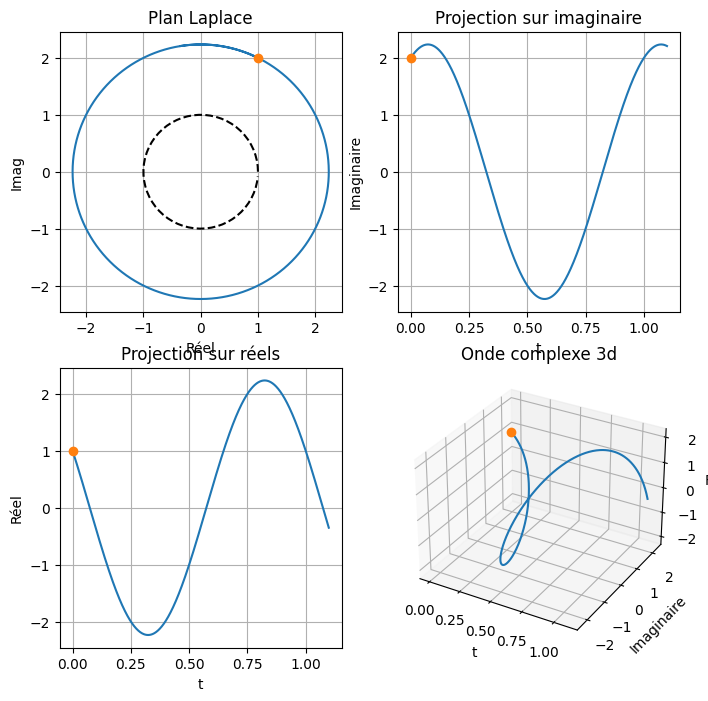

In [7]:
# A VOUS DE TROUVER Q = ?
Q = 2j + 1 # Modifiez ce nombre complexe et SHIFT + ENTREE pour voir

plot_onde_phaseur(tps=0,w=2*pi,rho=abs(Q),phi=angle(Q))

# Représentation avec phaseur I (cos) et Q(sin) : a(n) et b(n)
---

On peut représenter n'importe quelle onde déphasée et amplifiée sous forme d'un cosinus + un sinus.

En télécom c'est la représentation IQ : 
$A.cos(\omega.t+\varphi) = I.\cos(\omega.t) + Q.\sin(\omega.t) = I. \mathcal{R}\!\!\left[\vec{I}.e^{i\omega.t} \right] + Q . \mathcal{R}\!\!\left[\vec{Q}.e^{i\omega.t}\right]$

Pour les séries de Fourier on utilisera des pulsations multiples d'une pulsation fondamentale  $\omega_0$ et pour chaque multiple de rang $n$ de pulsation $\omega_n = n.\omega_0$ on aura une onde déphasée représenté par deux coefficients $a(n)$ et $b(n)$ :

$A_n . cos(\omega_n.t+\varphi_n) = a(n).\cos(\omega_n.t) + b(n).\sin(\omega.t)$


Dans le cas de fonctions réelles à valeurs réelles ($f : \mathbb{R}\to\mathbb{R}$), chaque composante réelle est une onde pure que l'on peut représenter par un phaseur :
<table>
  <tr>
    <td><img src=./anim_phaseur_somme.gif width=200></td>
    <td> \( \begin{array}{c} y(t) = \overbrace{A.e^{i\varphi}}^{\text{phaseur } z_y}.e^{i.\omega t} \in \mathbb{C} \\ s(t) = \mathcal{R}\left(y(t)\right) \in \mathbb{R} = A\cos(\omega t + \varphi) \\ \\ \mathcal{R}\left(y_1(t)=z_1.e^{i\omega t}\right)  = A_1\cos(\omega t + \varphi_1) \\ \mathcal{R}\left(y_2(t)=z_2.e^{i\omega t}\right) = A_2\cos(\omega t + \varphi_2) \\ y(t) = y_1(t) + y_2(t) = \underbrace{(z_1+z_2)}_{z}.e^{i\omega t} \in \mathbb{C} \\ \\ z = z_1 + z_2 \text{ constantes complexes}\\\mathcal{R}\left(y=y_1+y2\right) = \mathcal{R}\left(y_1\right) + \mathcal{R}\left(y_2\right) \\ A\cos(\omega t + \varphi) = A_2\cos(\omega t + \varphi_2) + A_1\cos(\omega t + \varphi_1)  \end{array} \) </td>
  </tr>
</table> 
 
Le phaseur est donc un vecteur du plan complexe représenté à l'instant $t=0$. Ce vecteur tourne en étant multiplié par $e^{i\omega t}$ créant une onde complexe dont la partie réelle est le signal réel représenté. En représentation I, Q le phaseur est décomposé en :
* Phaseur "In phase" : $\vec{I} = 1.e^{i 0} \quad= 1$ (bleu) est sur l'axe réel vers la droite ($A_2=1, \varphi_2=0$) : sa projection sur les réels donne $\cos{\omega t}$
* Phaseur "in Quadrature" : $\vec{Q} = 1.e^{-i\frac{\pi}{2}} \quad = -i$ (rouge) est **vers le bas !** sur l'axe imaginaire ($A_1=1, \varphi_1=-\frac{\pi}{2}$) : sa projection sur les réels donne $\sin(\omega t)$

On décompose alors $\vec{z} = I. \vec{I} + Q .\vec{Q}$ pour obtenir $s(t) = I cos(\omega t) + Q \sin(\omega t) = A \cos{(\omega t + \varphi)}$

In [8]:
dixieme = lambda x: np.round(x*10)/10
centieme = lambda x: np.round(x*100)/100
def IQ(I=1,Q=1,w=2*np.pi):
    fig,ax = plt.subplots(1,2)
    ax1=ax[0]
    ax2=ax[1]
    t=np.arange(-1.1*np.pi/w,1.2*np.pi/w,0.01)
    N0 = int(1.1*np.pi/w / 0.01)
    s = I*np.cos(w*t)+Q*np.sin(w*t)
    ax1.plot(t,I*np.cos(w*t),
             t,Q*np.sin(w*t),
             t,s)
    ax1.set_ylim(-3.4,4.4)
    minid = s.argmax()
    ax1.legend(["Inphase = I.cos(w.t)",
                "Quadrature=Q.sin(w.t)",
                "I.cos(w.t)+Q.sin(w.t)"],
              loc = "lower left")
    ax1.plot(t[minid],s[minid],'+')
    ax1.plot((0,t[minid]),(s[minid],s[minid]),'o-')
    ax1.text(t[minid]+0.05,s[minid],"A="+centieme(s[minid]).__str__()[:4])
    ax1.text(t[minid]/2,s[minid]+0.3,r"$\varphi$ ="+dixieme((-t[minid]/2/np.pi*w*360)).__str__()[:4])
    ax1.grid("on")
    sc= np.exp(1j*w*t)
    ax2.set_xlim(-3,3)
    ax2.set_ylim(-3,3)
    ax2.grid("on")
    ax2.plot([0,I],[0,0],[0,0],[0,-Q],[0,I],[0,-Q])
    ax2.plot(I,-Q,'+')
    Nd = min(N0,minid)
    Nf = max(N0,minid)+1
    ax2.plot(np.real(sc[Nd:Nf]),-np.imag(sc[Nd:Nf]),'-o')
    ax2.text(I+0.05,-Q-0.05,"A="+s[minid].__str__()[:4])
    ax2.text(1.1*np.real(sc[int((Nd+Nf)/2)]),-1.1*np.imag(sc[int((Nd+Nf)/2)]),r"$\varphi$ ="+dixieme(-t[minid]/2/np.pi*w*360).__str__()[:4])
    ax2.plot(np.real(sc),np.imag(sc),'-.k')
    ax2.quiver([0,0],[0,0],[0,1],[-1,0])
    ax2.text(0.1,0.1,r"$\vec{I}$")
    ax2.text(-0.2,-0.1,r"$\vec{Q}$")
    

In [9]:
_ = interact(IQ, I=(-3,3,0.1), Q=(-3,3,0.1), w=fixed(2*np.pi))

interactive(children=(FloatSlider(value=1.0, description='I', max=3.0, min=-3.0), FloatSlider(value=1.0, descr…

## Exercice : Phaseur vers IQ et A$\varphi$
> Exercice [Ch2-Ex2.2 a)](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#section.2.8) :  
> Dans l'expression $(1+j).e^{i.10.t}$, vous retrouvez un phaseur $(1+j)$ qu'il est facile de décomposer en IQ (attention au signe !).  
> Dans le plan complexe l'amplitude $A$ et la phase $\phi$ se retrouvent facilement en écrivant le phaseur en coordonnées polaires : $i+j = \sqrt{2}.e^{i.\frac{\pi}{4}}$.

1.4142135623730951

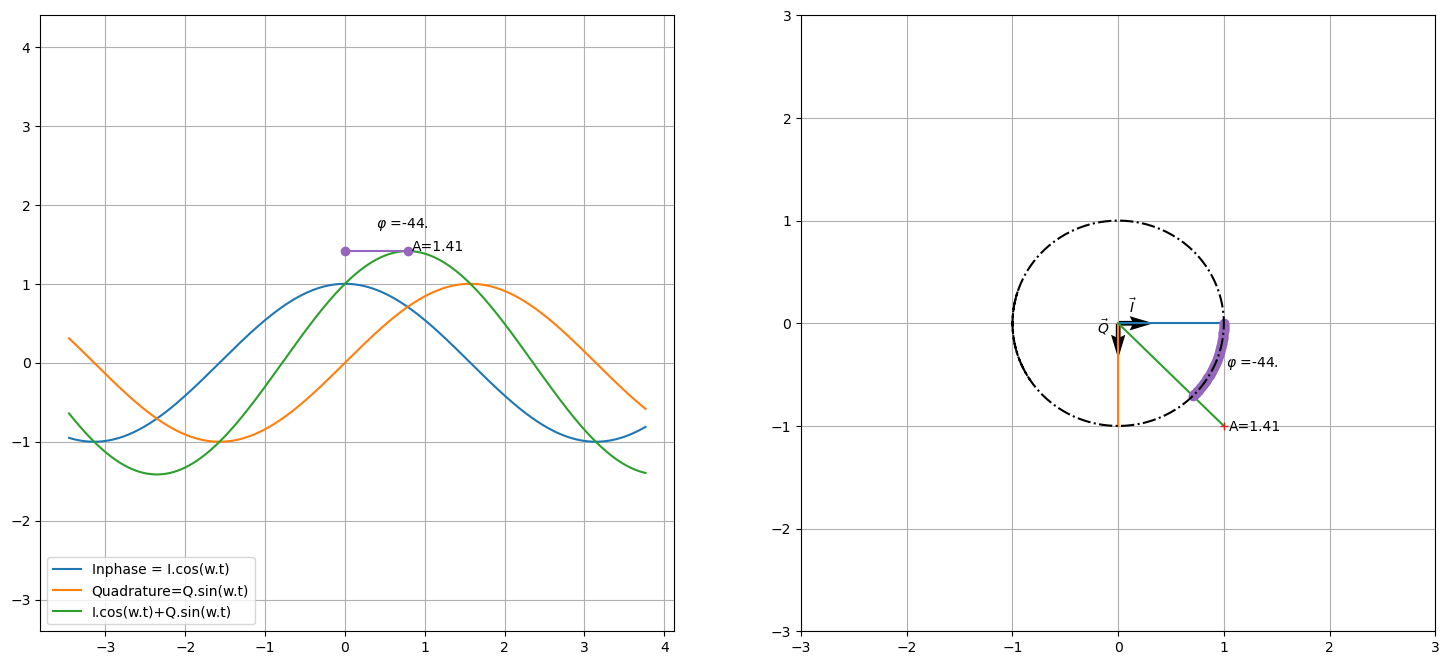

In [12]:
## CORRIGEZ l'ERREUR ! 
# I,Q doivent être faux car on a la bonne amplitude
# mais la phase veut -45 au lieu de +45 degrés (l'argument de l'exp et +i.pi/4)
IQ(I=1, Q=1, w=1)
sqrt(2)

## Exercice : A$\varphi$ vers Phaseur et IQ 
> Exercice [Ch2-Ex4 a)](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#page=39) :  
> * Dans $\frac{1}{2}e^{i.2\pi.t+\frac{\pi}{3}}$, trouvez le phaseur en factorisant ce qui est constant dans le temps pour avoir la forme $Z.e^{i.\omega.t}$ avec $Z=\rho.e^{i.\varphi}\in\mathbb{C}$ le phaseur et $\omega\in\mathbb{R}$ la pulsation en rad/s   
> * Passez ce phaseur de la représentation polaire à la forme $a+I.b$ et trouvez ainsi le I (ou $a_n$) et le Q (ou $b_n$) permettant d'avoir $I\cos(\omega.t)+Q\sin(\omega.t)$
> On doit obtenir une sinusoide d'amplitude 0.5 avec $\frac{\pi}{3}$ d'avance de phase sur le cosinus car   
> $\mathcal{R}\!\!\left(\frac{1}{2}.e^{2\pi.t+\frac{\pi}{3}}\right) = \frac{1}{2}.\cos\left(2\pi.t+\frac{\pi}{3}\right)$

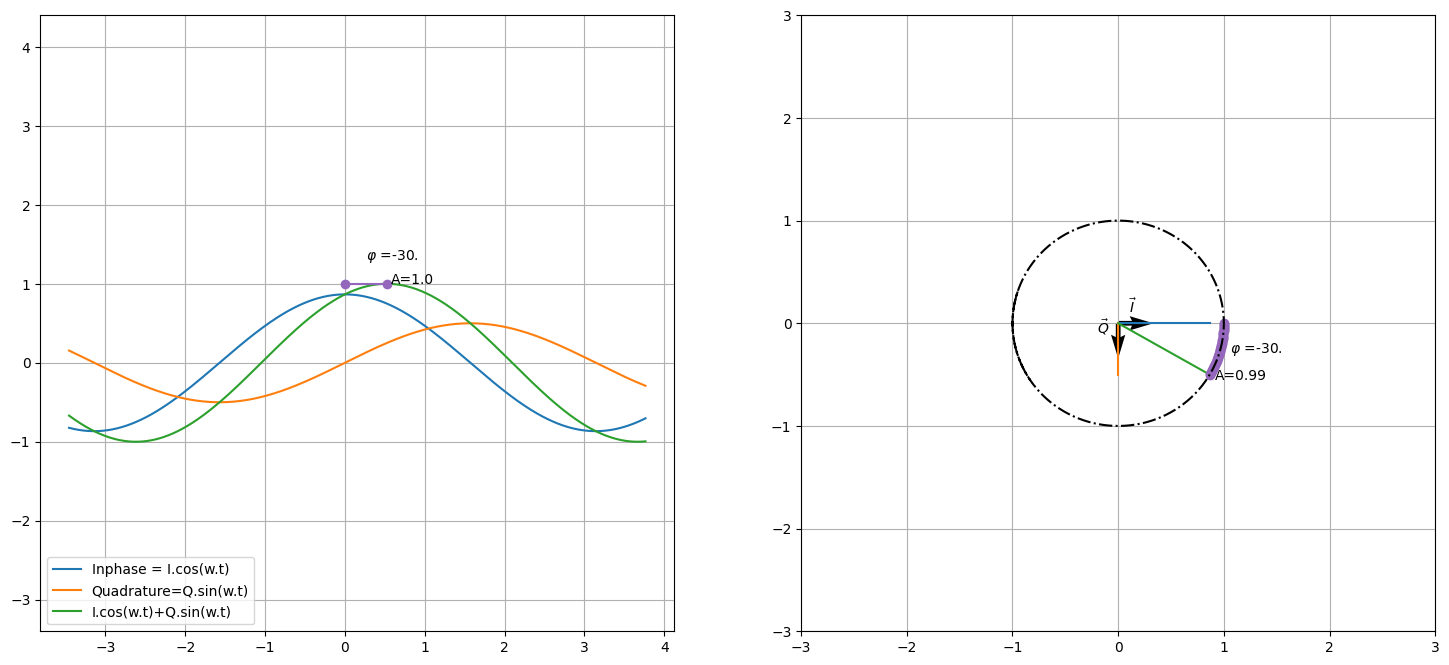

In [10]:
## CORRIGEZ l'erreur
# on veut 0.5 d'amplitude et phi = +60 (le pi/3 du cos)
IQ(I=sqrt(3)/2, Q=1/2, w=1)

## Exercice : IQ vers phaseur vers A$\varphi$
> Exercice [Ch2-Ex4 c)](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24741#page=39) :  
> * Dans  $\frac{\sqrt{3}}{2}.\cos\left(2\pi.t\right)+\frac{1}{2}.\sin\left(2\pi.t\right)$ vous avez directement la représentation IQ. Donnez le phaseur $Z_c=a + i.b$ en faisant attention au signe. Quelle doit être la période $T$[s], la fréquence $f$[Hz] et la pulsation $\omega$[rad/s] de ce signal.
> * Passez ce phaseur à la représentation polaire $Z_c = \rho.e^{i.\varphi}= a+I.b$ et trouvez ainsi l'amplitude et le déphasage du cosinus $\rho .\cos\left(\omega.t+\varphi\right)$

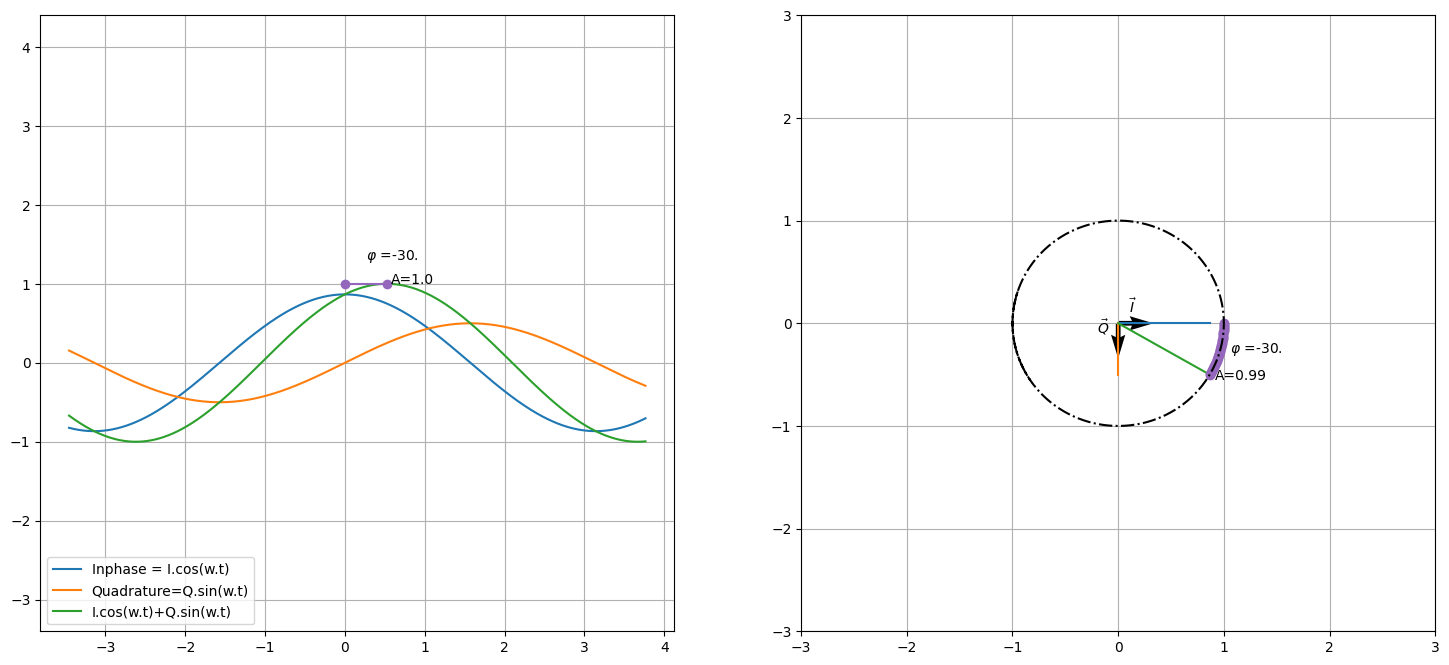

In [11]:
## CORRIGEZ L'ERREUR DE SIGNE et de période!
# on veut 0.5 d'amplitude et phi = +60 (le pi/3 du cos)
IQ(I=sqrt(3)/2, Q=1/2, w=1)

# Représentation avec ondes complexes conjuguées : $c(n)$
---

La partie réelle d'un phaseur $z=I-i.Q$ peut être obtenue par la **somme de deux ondes imaginaires conjuguées** $e^{i\omega.t}$ et $e^{-i.\omega_n.t}$ faisant apparaître une **fréquence négative -$\omega$** car ce sont des ondes imaginaires qui représentent une onde réelle.

Ainsi pour une composante de rang n d'une série nous avons : 

$ \mathcal{R}\!\!\left[z_n.e^{i.\omega_n.t}\right] = \quad \quad c_n.e^{i\omega_n.t} + \overline{c_n}.e^{-i\omega_n.t} \quad \quad = a_n.cos(\omega_n.t)+b_n.\sin(\omega_n.t) \quad= A_n.\cos{\omega_n.t+\varphi_n} $

Les composantes d'une série de Fourier étant des ondes complexes, on peut les représenter en phaseur, IQ et aussi en somme de conjugués car :

$s(t) = \mathcal{R}\left(z.e^{i\omega t}\right) = \frac{z.e^{i\omega t} + \overline{z.e^{i\omega t}}}{2} = \frac{z}{2}.e^{i\omega t} + \frac{\overline{z}}{2}.e^{-i\omega t}$

Les différentes représentations d'une composante pour $\omega = n \omega_0$ sont  illustrées ci-dessous :

<img src=../images/phaseur_et_cn_an_bn.png width=600>

$\def\famp{f_n(t) = A\cos(n \omega_0 t + \varphi)}$
$\def\fiq{f_n(t) = \underbrace{a(n)}_{I_n}\cos(n \omega_0 t)+\underbrace{b(n)}_{Q_n}\sin(n \omega_0 t)}$
$\def\bleu{\mathcal{R}\left(\text{Phaseur noir a(n).In + phaseur noir b(n).Qn}\right)}$

* Amplitude et phase $\famp{}$ : Signal bleu sur l'axe réel
* IQ (a(n) et b(n)) $\fiq{}$ : bleu = $\bleu{}$
* Somme de conjugués -c(n)-  $f_n(t) = c(n).e^{i n \omega_0 t}+ \underbrace{c(-n)}_{\overline{c(n)}}.e^{-i n \omega_0 t}$ :  bleu = somme des roses
* Phaseur,  $f_n(t) = \mathcal{R}\left( z_n e^{n\omega_0 t}\right)$  +  bleu = $\mathcal{R}\left(\text{Phaseur orange z}\right)$


Remarquez sur la figure que pour qu'une onde soit réelle dans la représentation complexe $c(n).e^{i n \omega_0 t}+c(-n).e^{-i n \omega_0 t}$ ***pour tout t***, il faut que $c(n).e^{i n \omega_0 t}$ soit le conjugué de $c(-n).e^{-i n \omega_0 t}$ ce qui impose :
  - f réelle, $\forall t \quad \implies \quad c(n)=\overline{c(-n)}, \forall n$
  - $\exists t \;|\; f(t)$ imaginaire $\implies \quad \exists n \;|\; c(n)\neq\overline{c(-n)}$


**La composante Q est vers le bas pour que sa partie réelle soit un sinus lorsque Q tourne dans le sens positif**. On décompose le phaseur dans la base IQ pour avoir $z_n = a(n) I_n + b(n) Q_n$ et donc les relations entre $a(n)$, $b(n)$ et $c(n)$ qui se trouvent géométriquement :
  - $2 \mathcal{R}(C(n)) = c(n) + \overbrace{c(-n)}^{\overline{c(n)}} = a(n)$ pour l'axe I du cosinus 
  - $2 \mathcal{I}(C(n)) = c(n) - c(-n) =  - b(n) $ pour l'axe Q du sinus (le moins car Q est vers le bas)

